**La majorité des observations sont présent dans le rapport joint au notebook**. 

Le code étant en anglais, les commentaires le sont aussi afin de garder une certaine cohérence.

Auteur : 

ASSABAR Taoufik, cip : asst1001

BELLARI Nada, cip : beln1812

PERRIN Yanis,  cip : pery2002

# Import des bibliothèques

In [1]:
import data_manager.Loader
import data_manager.Preprocessor
import analyzer.Analyzer
import classifier.Classifier
import classifier.LogisticRegressionModel
import classifier.SVMModel
import classifier.DecisionTreeModel
import classifier.RandomForestModel
import classifier.MLPModel
import classifier.KNNModel

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Loading dataset

In [2]:
# Create Loader instance
loader = data_manager.Loader.Loader('')

# Load dataset
loader.load()

# Get the trainset 
trainset = loader.get_trainset()

In [3]:
trainset

id                species   margin1   margin2   margin3   margin4  \
0       1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1       2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2       3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3       5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4       6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
..    ...                    ...       ...       ...       ...       ...   
985  1575   Magnolia_Salicifolia  0.060547  0.119140  0.007812  0.003906   
986  1578            Acer_Pictum  0.001953  0.003906  0.021484  0.107420   
987  1581     Alnus_Maximowiczii  0.001953  0.003906  0.000000  0.021484   
988  1582          Quercus_Rubra  0.000000  0.000000  0.046875  0.056641   
989  1584         Quercus_Afares  0.023438  0.019531  0.031250  0.015625   

      margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0    0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1    0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2    0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3    0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4    0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   
..        ...       ...       ...      ...  ...        ...        ...   
985  0.000000  0.148440  0.017578      0.0  ...   0.242190   0.000000   
986  0.001953  0.000000  0.000000      0.0  ...   0.170900   0.000000   
987  0.078125  0.003906  0.007812      0.0  ...   0.004883   0.000977   
988  0.009766  0.000000  0.000000      0.0  ...   0.083008   0.030273   
989  0.005859  0.019531  0.035156      0.0  ...   0.000000   0.000000   

     texture57  texture58  texture59  texture60  texture61  texture62  \
0     0.002930   0.002930   0.035156   0.000000   0.000000   0.004883   
1     0.000000   0.000977   0.023438   0.000000   0.000000   0.000977   
2     0.005859   0.000977   0.007812   0.000000   0.000000   0.000000   
3     0.000000   0.000000   0.020508   0.000000   0.000000   0.017578   
4     0.021484   0.000000   0.000000   0.000000   0.000000   0.000000   
..         ...        ...        ...        ...        ...        ...   
985   0.034180   0.000000   0.010742   0.000000   0.000000   0.000000   
986   0.018555   0.000000   0.011719   0.000000   0.000000   0.000977   
987   0.004883   0.027344   0.016602   0.007812   0.000000   0.027344   
988   0.000977   0.002930   0.014648   0.000000   0.041992   0.000000   
989   0.002930   0.000000   0.012695   0.000000   0.000000   0.023438   

     texture63  texture64  
0     0.000000   0.025391  
1     0.039062   0.022461  
2     0.020508   0.002930  
3     0.000000   0.047852  
4     0.000000   0.031250  
..         ...        ...  
985   0.000000   0.018555  
986   0.000000   0.021484  
987   0.000000   0.001953  
988   0.001953   0.002930  
989   0.025391   0.022461  

[990 rows x 194 columns]

# Dataset Analysis

In [4]:
# Create Analyzer instance
analyzer=analyzer.Analyzer.Analyzer()

In [5]:
# Number of observations and features in the dataset
print(f"Nombre of observations : {analyzer.get_shape(trainset)[0]}")
print(f"Nombre of features : {analyzer.get_shape(trainset)[1]}")

Nombre of observations : 990
Nombre of features : 194


In [6]:
# Number of columns by type
analyzer.number_of_columns_by_type(trainset)

float64    192
int64        1
object       1
dtype: int64

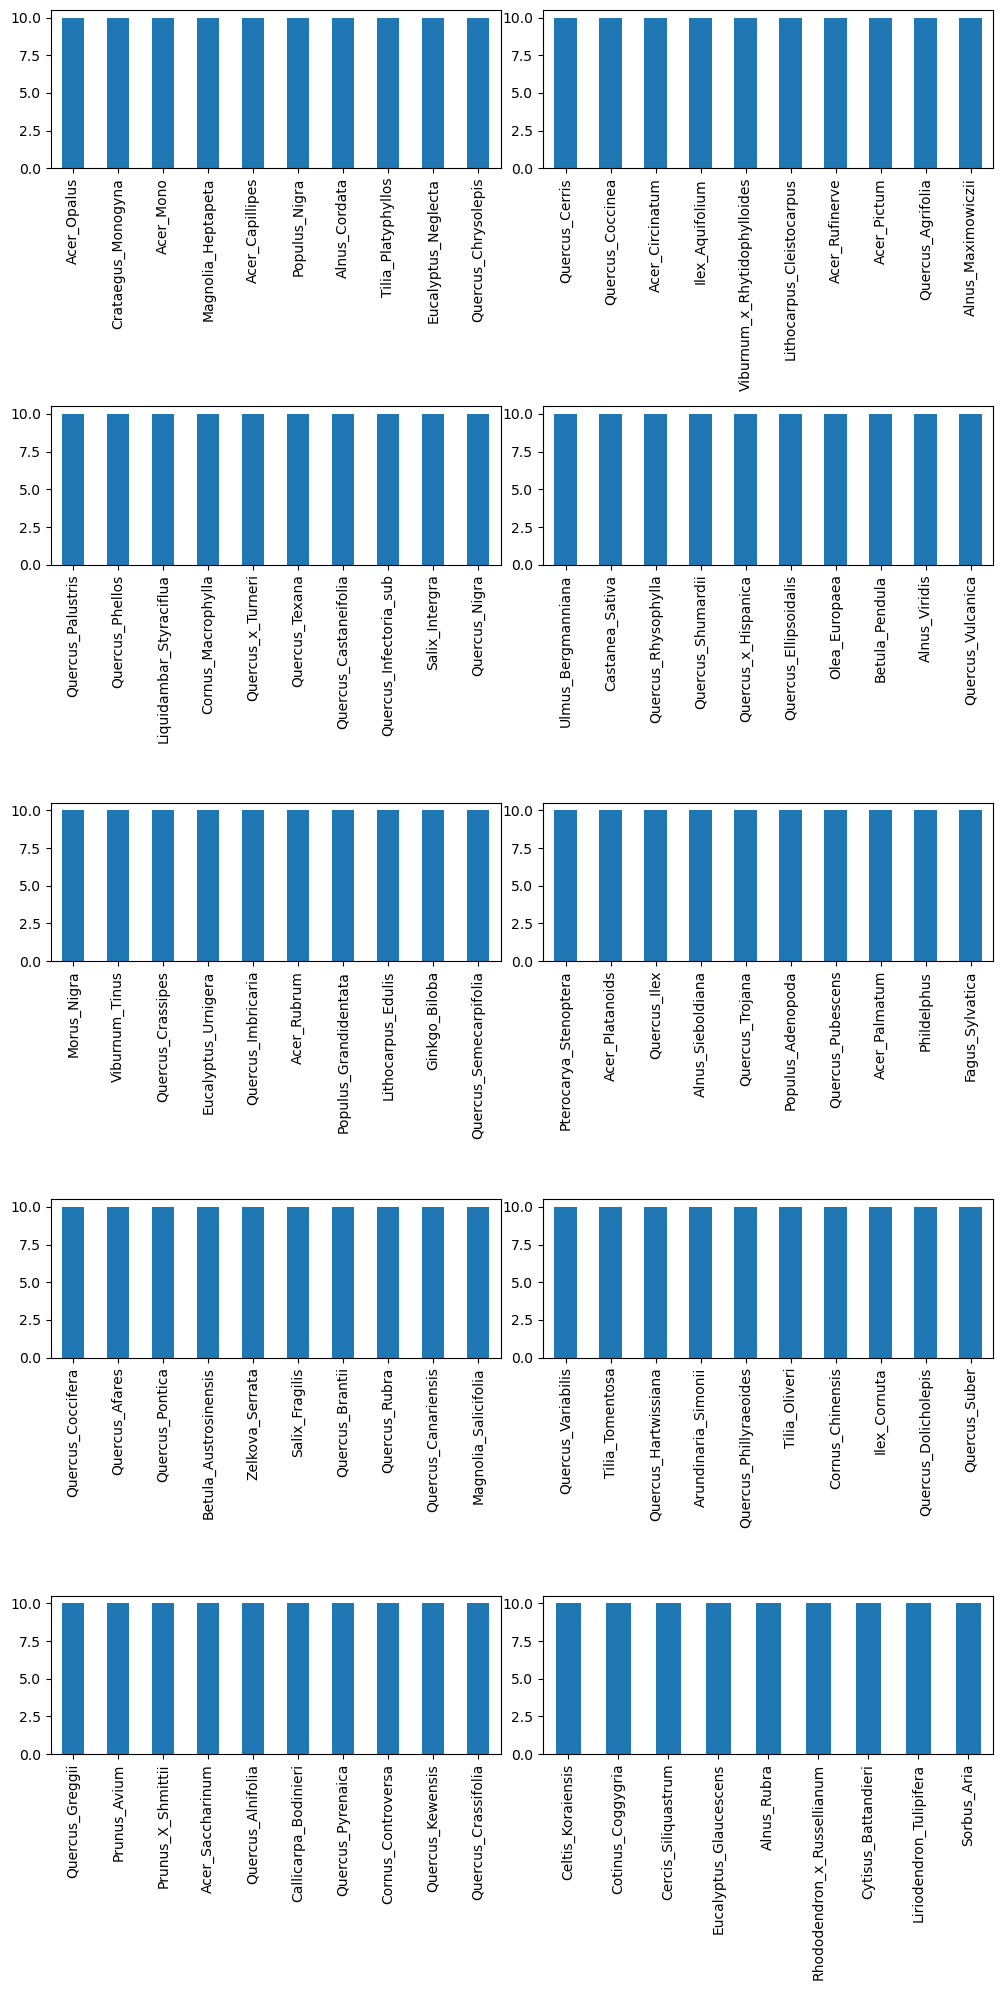

In [7]:
# Number of observations per class (we have 99 differents species)
analyzer.number_of_observations_per_class(trainset, "species")

Each class present the same amount of values, the dataset is well balanced.

## Missing and duplicated values

In [8]:
print("Number of missing values in the dataset : ", analyzer.number_na(trainset))
print("Number of duplicated values in the dataset : ", analyzer.number_duplicated(trainset))
print("Number of duplicated values in the dataset without the column id : ", analyzer.number_duplicated(trainset.drop(columns="id", axis=1)))
print("\nStatistics of the dataset : ") 
analyzer.statistics(trainset)

Number of missing values in the dataset :  0
Number of duplicated values in the dataset :  0
Number of duplicated values in the dataset without the column id :  0

Statistics of the dataset : 


id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

- The dataset seems to present several outliers, some maximum values are very far from the average values, let's check with histogram and boxplot.

In [9]:
# Histogram
analyzer.histogram(trainset, ['margin2', 'margin3', 'margin4'])

In [10]:
# Boxplot
analyzer.boxplot(trainset, ['margin2', 'margin3', 'margin4'])

- It seems that some point are far from the median of the variable. Our hypothesis was good, there are indeed outliers present in our dataset as shown in histogram and boxplot, let's replace them by better values

# Preprocessing

In [11]:
# Create Preprocessor instance
preprocessor = data_manager.Preprocessor.Preprocessor()

# Drop the "id" column
trainset = preprocessor.drop_column(trainset,"id")

# Replace outliers by nan values
trainset = preprocessor.replace_outliers_na(trainset, trainset.columns[1:])

# Analyze the percentage of nan value by column
print("Percentage of nan value by column :")
analyzer.percentage_na_by_column(trainset)

Percentage of nan value by column :


species        0.000000
margin1        4.141414
margin2        7.878788
margin3        4.141414
margin4        7.474747
                ...    
texture60    100.000000
texture61    100.000000
texture62     10.404040
texture63      7.676768
texture64      4.343434
Length: 193, dtype: float64

In [12]:
# Drop column that contains more that 50% of nan values
trainset = preprocessor.drop_column_na(trainset, 50)

# Encoding the target 
trainset = preprocessor.encoding(trainset, "species")

# Imputation
trainset = preprocessor.knn_imputer(trainset, trainset.columns[1:])

# Analyze the percentage of nan value by column
print("Percentage of nan value by column after the replacement :")
analyzer.percentage_na_by_column(trainset)

Percentage of nan value by column after the replacement :


species      0.0
margin1      0.0
margin2      0.0
margin3      0.0
margin4      0.0
            ... 
texture58    0.0
texture59    0.0
texture62    0.0
texture63    0.0
texture64    0.0
Length: 184, dtype: float64

In [13]:
# Shuffle the data
dataset = preprocessor.shuffle(trainset)

# Separate target from datas
data, target = preprocessor.split_dataset(dataset, "species")

# Create training set and testing set
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.33, stratify=target)

# Standardization of testing set (the standardization of training set will be for each training subset)
test_data = preprocessor.standardization(test_data, test_data.columns)

- Now that the training dataset is created, let's doing some cross-validation to train-valid our models and then test them on the test dataset

# Cross validation and grid search

In [43]:
LR = classifier.LogisticRegressionModel.LogisticRegressionModel()
SVM = classifier.SVMModel.SVMModel()
DT = classifier.DecisionTreeModel.DecisionTreeModel()
RF = classifier.RandomForestModel.RandomForestModel()
MLP = classifier.MLPModel.MLPModel()
KNN = classifier.KNNModel.KNNModel()

# Our 6 models
models = [LR, SVM, DT, RF, MLP, KNN]

# The cross-validation strategy
kf = KFold(n_splits=5)

# The list that will contains all the score of all the models
all_train_score = []
all_validation_score = []
all_test_score = []
all_f1_score = []

# For each model, we apply the cross-validation (1)train 2)validation 3)test)
for classif in models :
    
    # Create list to store training and test score of the model
    train_score = []
    validation_score = []
    test_score = []
    f1_cv = []

    # Create Classifier instance 
    clf=classif

    # Run the gridsearch algorithm to find the best hyperparameters
    clf.gridsearch(preprocessor.standardization(train_data, train_data.columns), train_target, None)
    
    # Memorize the model with best hyperparameters
    clf_gs = clf.get_model()

    # For each split 
    for train_index, validation_index in kf.split(train_data):
    
        # Divide the dataset into n-1 split of training and 1 split of validation
        X_train, X_valid = train_data.iloc[train_index], train_data.iloc[validation_index]
        y_train, y_valid = train_target.iloc[train_index], train_target.iloc[validation_index]
    
        # Standardization for each split
        X_train, X_valid = preprocessor.standardization(X_train, X_train.columns), preprocessor.standardization(X_valid, X_valid.columns)
    
        # Create Classifier instance with the best grid search hyperparameters
        clf = classif
        clf.set_model(clf_gs)
    
        # Train the classifier
        clf.train(X_train, y_train)
    
        # Evaluate the model on the training, validation subsets and then on the test set
        train_score.append(clf.test(X_train, y_train))
        validation_score.append(clf.test(X_valid, y_valid))
        test_score.append(clf.test(test_data, test_target))
        f1_cv.append(clf.test(test_data, test_target, "f1_score"))
    
    # add scores to the lists
    all_train_score.append(train_score)
    all_validation_score.append(validation_score)
    all_test_score.append(test_score)
    all_f1_score.append(f1_cv)

Best Grid Search parameters for Logistic Regression model:  {'C': 1.0, 'solver': 'lbfgs'}
Best Grid Search parameters for SVM model:  {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}
Best Grid Search parameters for Decision Tree model:  {'criterion': 'entropy', 'max_depth': 10}
Best Grid Search parameters for Random Forest model:  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 500}
Best Grid Search parameters for MLP model:  {'alpha': 1.0, 'hidden_layer_sizes': (99,)}
Best Grid Search parameters for K Nearest Neighbors model:  {'n_neighbors': 1, 'weights': 'uniform'}


# Scores

- Now let's check the train-validation and test scores for each model during the cross validation

In [44]:
# Materials that will be needed to create the curves and scores plots

# Get the best models
all_model = []

# Get the param name and range to test for the validations curves
all_param_name = []
all_param_range = []

# For each model we recup all the infos needed
for model in models:
    all_model.append(model.get_model())
    all_param_name.append(list(model.get_validation_parameters().keys())[0])
    all_param_range.append(list(model.get_validation_parameters().values())[0])
    
# Create Dataframe containing all the scores
cols=["Classifier", "Mean Train Score", "Mean Validation Score", "Mean Test Score", "Mean F1 Score"] 
datas = [] 
for i, clf in enumerate(models):
    name = clf.__class__.__name__
    mean_train = np.mean(all_train_score[i], axis=0)
    mean_validation = np.mean(all_validation_score[i], axis=0)
    mean_test = np.mean(all_test_score[i], axis=0)
    mean_f1 = np.mean(all_f1_score[i], axis=0)
    datas.append([name, mean_train, mean_validation, mean_test, mean_f1])

# Dataframe
df_scores = pd.DataFrame(data = datas,columns=cols)
scores = [all_train_score, all_validation_score, all_test_score, all_f1_score]

In [9]:
# dataframe that contains all the scores
df_scores

Classifier  Mean Train Score  Mean Validation Score  \
0  LogisticRegressionModel               1.0               0.977364   
1                 SVMModel               1.0               0.971337   
2        DecisionTreeModel               1.0               0.456869   
3        RandomForestModel               1.0               0.909455   
4                 MLPModel               1.0               0.945717   
5                 KNNModel               1.0               0.948701   

   Mean Test Score  Mean F1 Score  
0         0.971865       0.970684  
1         0.977370       0.976547  
2         0.519266       0.496381  
3         0.939450       0.937172  
4         0.958410       0.956866  
5         0.968807       0.968143

## Cross validation scores

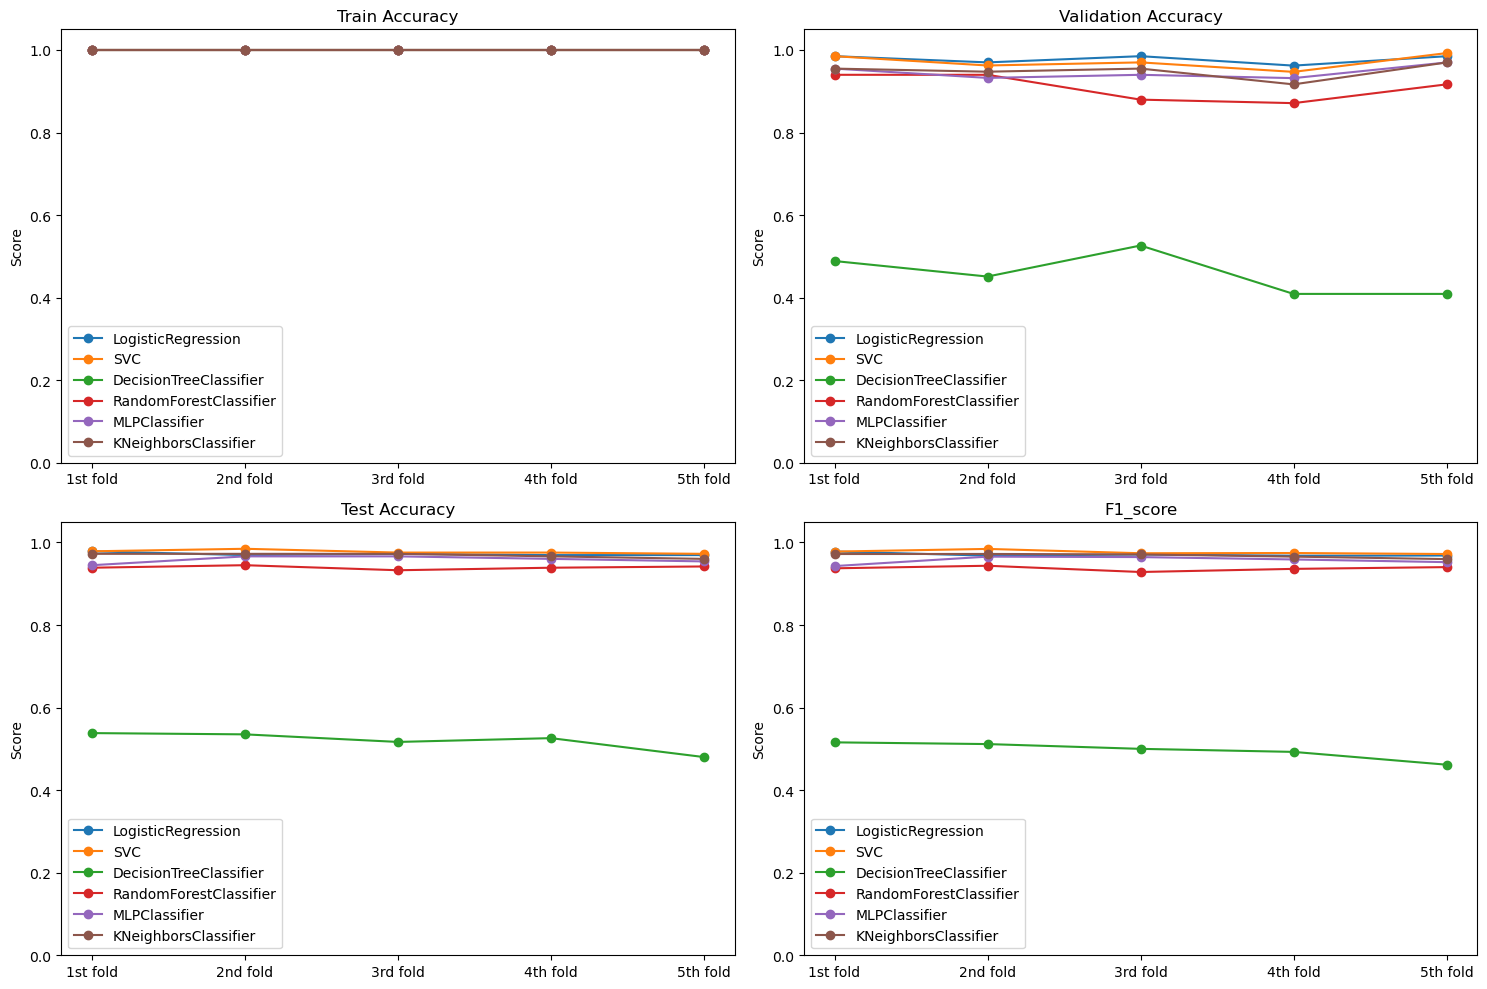

In [10]:
# The different scores according to the different cross-validation splits
analyzer.plot_scores(scores, all_model)

- The scores are generally very good except for the decision trees which show their limit

## Mean scores

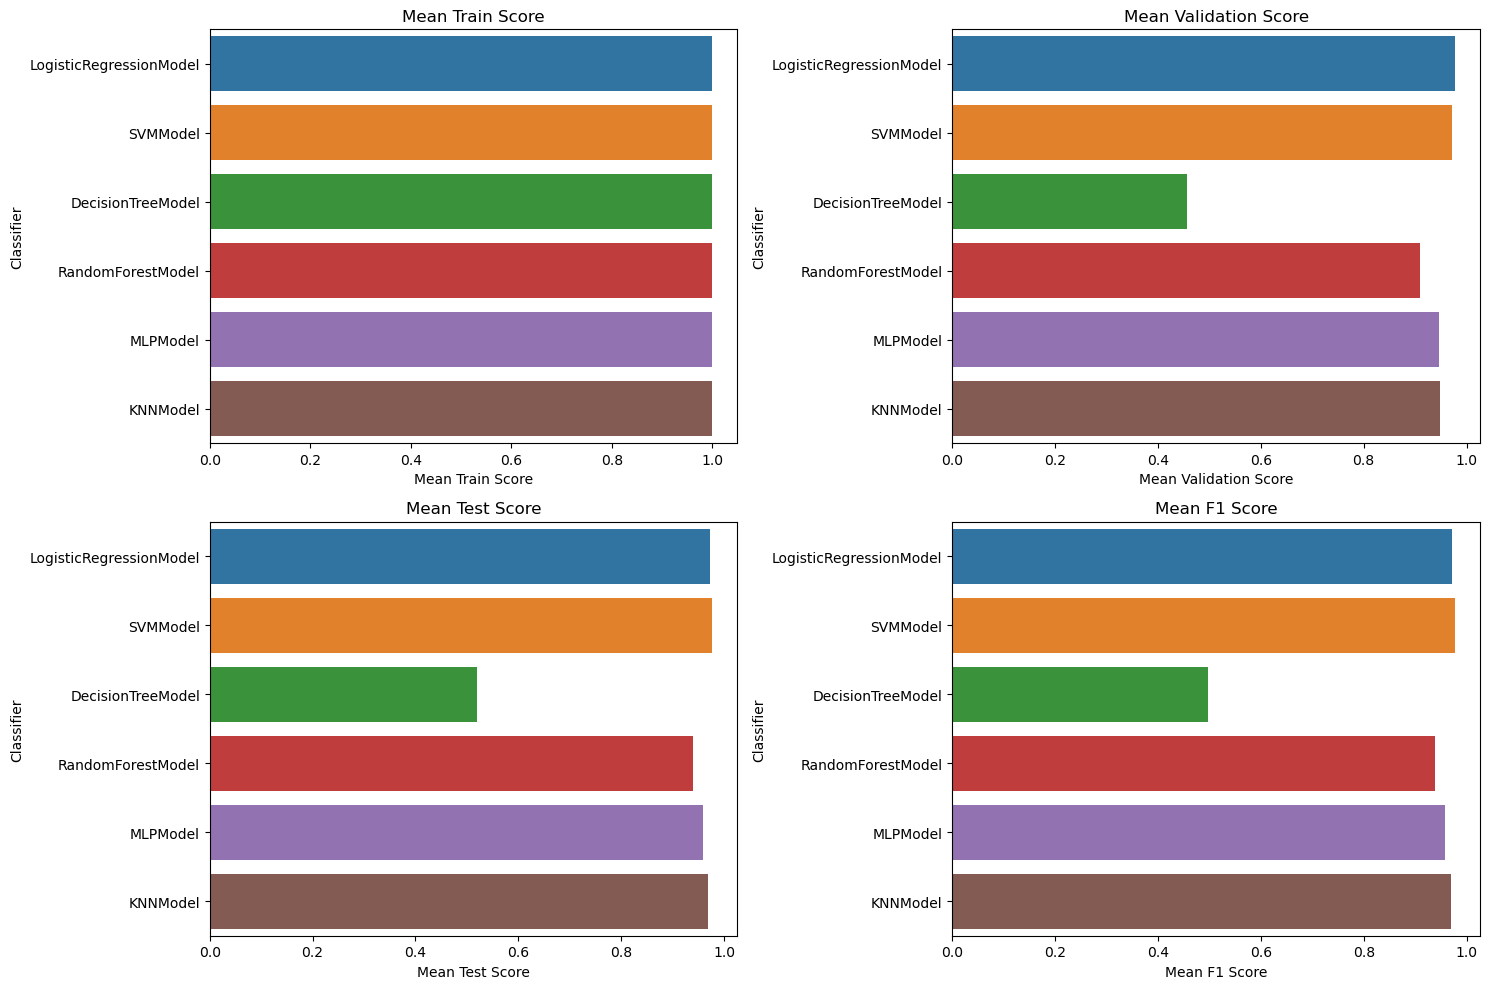

In [12]:
# Mean scores for each model
analyzer.barplot_mean_score(df_scores, df_scores.columns[1:], "Classifier")

# Curves

- Let's plot the learning curves

## Learning Curves

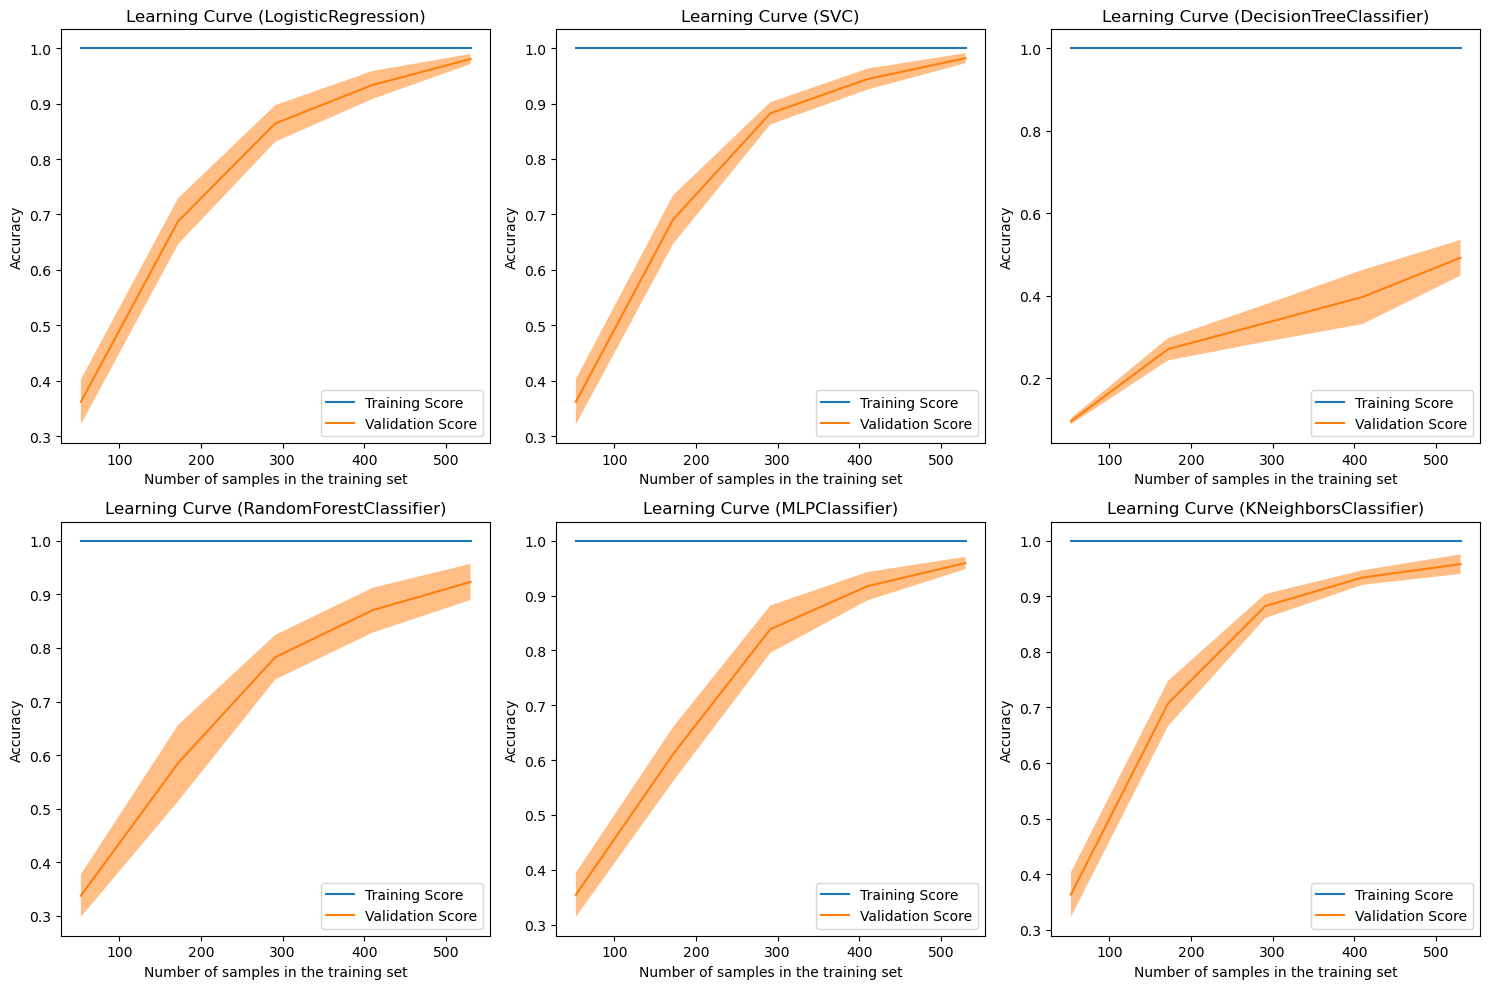

In [11]:
analyzer.plot_learning_curves(all_model, train_data, train_target)

- Overfitting can be observed for all models. 
The hyperparameters returned by the grid search algorithm and cross validation should avoid this problem. 
We can make the observation that our models are too complex for the dataset.

## Validation Curves

- Let's plot the validation curves

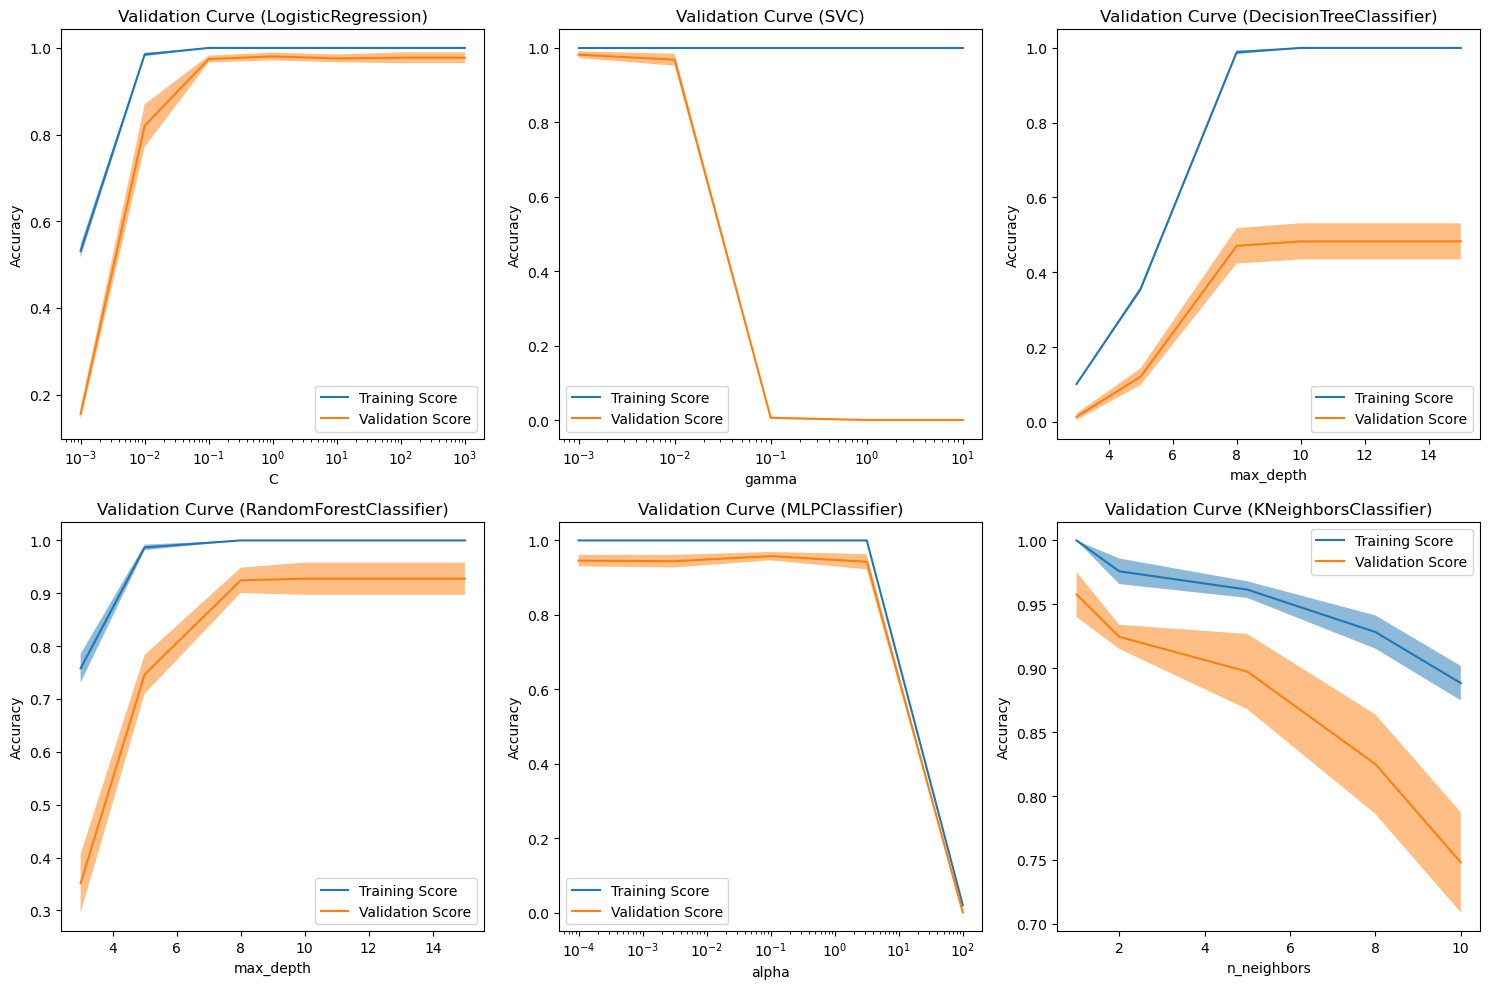

In [13]:
analyzer.plot_validation_curves(all_model, train_data, train_target, all_param_name, all_param_range)

## Roc Curves

- let's plot the roc curves

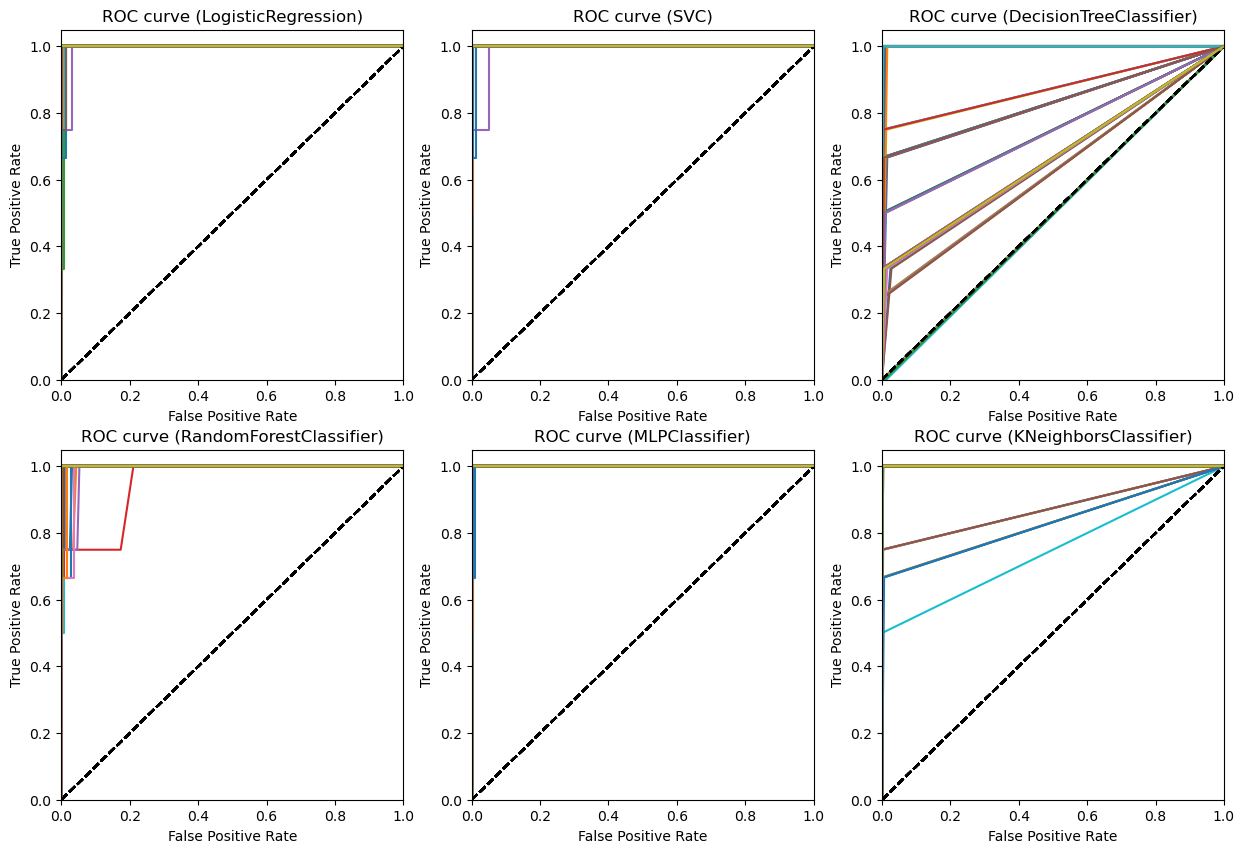

In [14]:
# Roc Curve for each class
analyzer.plot_roc_curve_multilabel(all_model, test_data, test_target)

## Mean Roc Curves

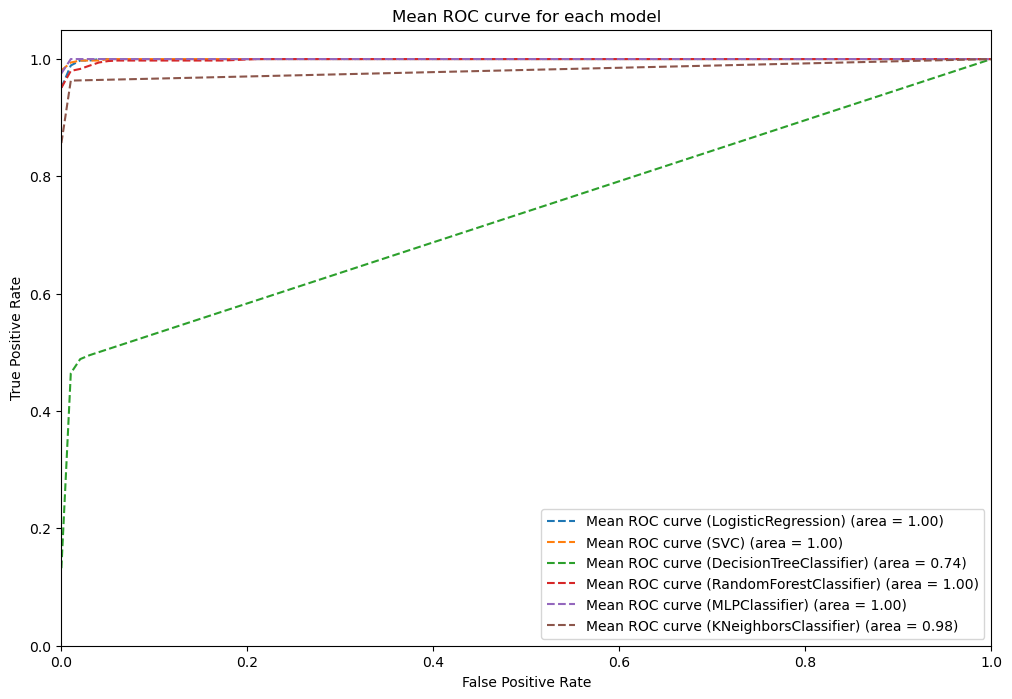

In [15]:
analyzer.plot_mean_roc_curve(all_model, test_data, test_target)

# Features Selection

In [14]:
print(f"Number of features before the application of the RFE algorithm : {dataset.shape[1]-1}")

Number of features before the application of the RFE algorithm : 183


In [15]:
# Selection of the estimator for the recursive elimination feature algorithm
estimator = RandomForestClassifier(random_state = 42)

# Application of the RFE algorithm
dataset_rfe = preprocessor.rfe_selection(trainset, data, target, estimator)

# Shuffle the data
dataset_rfe = preprocessor.shuffle(dataset_rfe)

# Separate target from datas
data_rfe, target_rfe = preprocessor.split_dataset(dataset_rfe, "species")

# Create training set and testing set
train_data, test_data, train_target, test_target = train_test_split(data_rfe, target_rfe, test_size=0.33, stratify=target)

# Standardization of testing set (the standardization of training set will be for each training subset)
test_data = preprocessor.standardization(test_data, test_data.columns)

In [16]:
print(f"Number of features after the application of the RFE algorithm : {dataset_rfe.shape[1]-1}")

Number of features after the application of the RFE algorithm : 91


**After reapplication of the algorithms above :**

## Cross validation scores

In [26]:
# dataframe that contains all the scores
df_scores

Classifier  Mean Train Score  Mean Validation Score  \
0  LogisticRegressionModel               1.0               0.956254   
1                 SVMModel               1.0               0.944201   
2        DecisionTreeModel               1.0               0.494771   
3        RandomForestModel               1.0               0.891445   
4                 MLPModel               1.0               0.932114   
5                 KNNModel               1.0               0.929152   

   Mean Test Score  Mean F1 Score  
0         0.966361       0.964813  
1         0.967584       0.966682  
2         0.489908       0.477679  
3         0.889297       0.885776  
4         0.952294       0.952274  
5         0.949235       0.947921

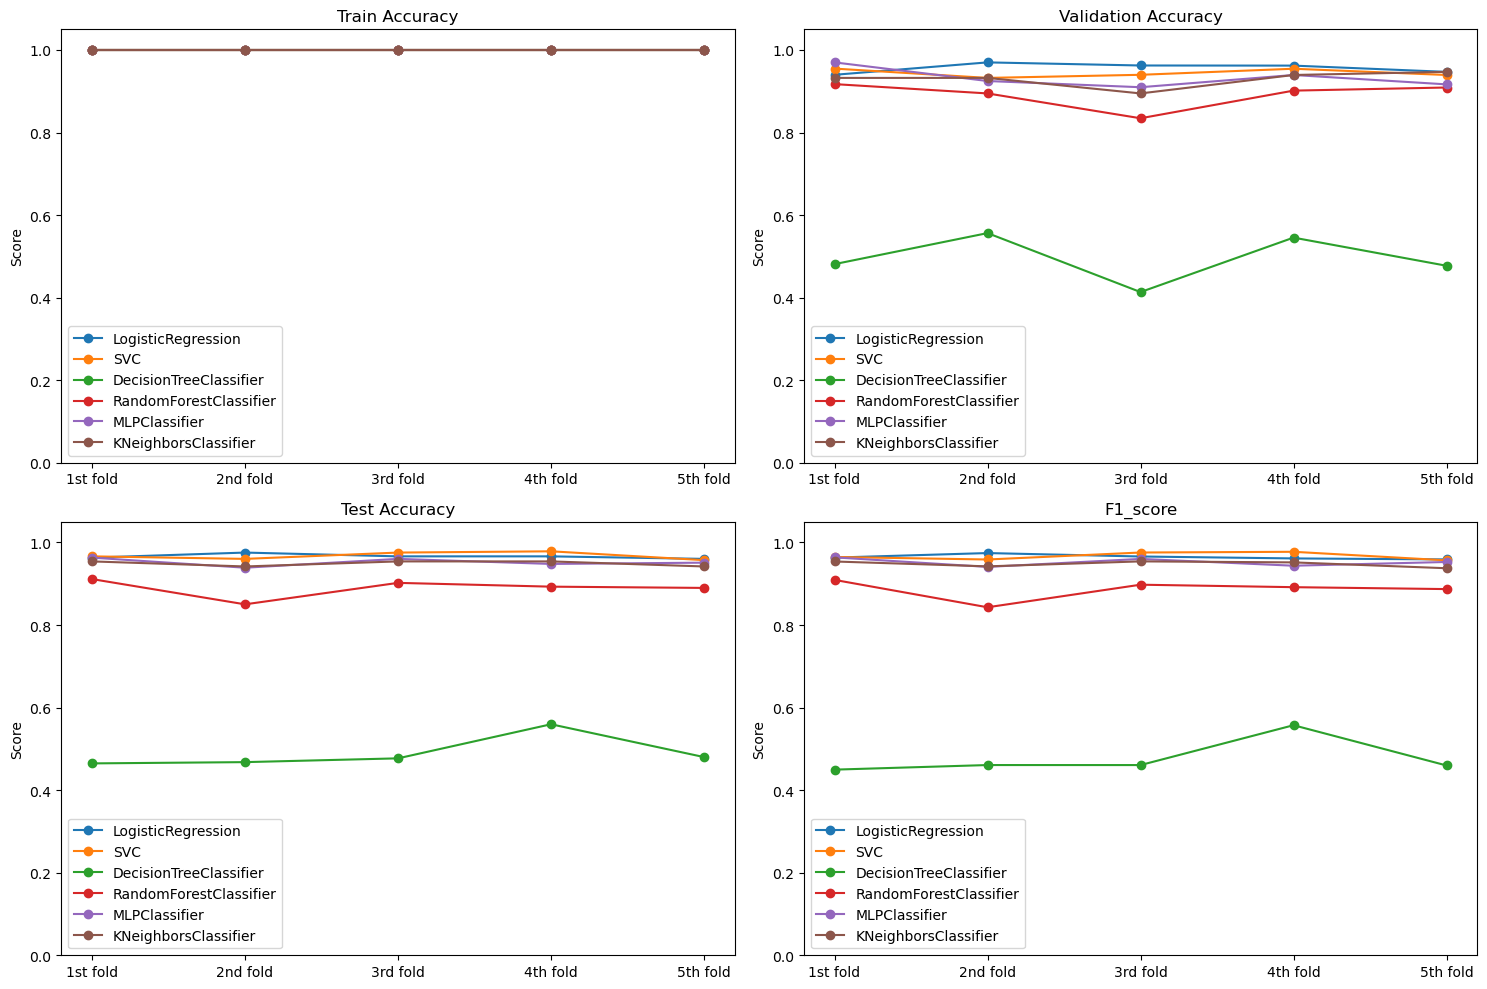

In [29]:
# The different scores according to the different cross-validation splits
analyzer.plot_scores(scores, all_model)

## Mean Scores

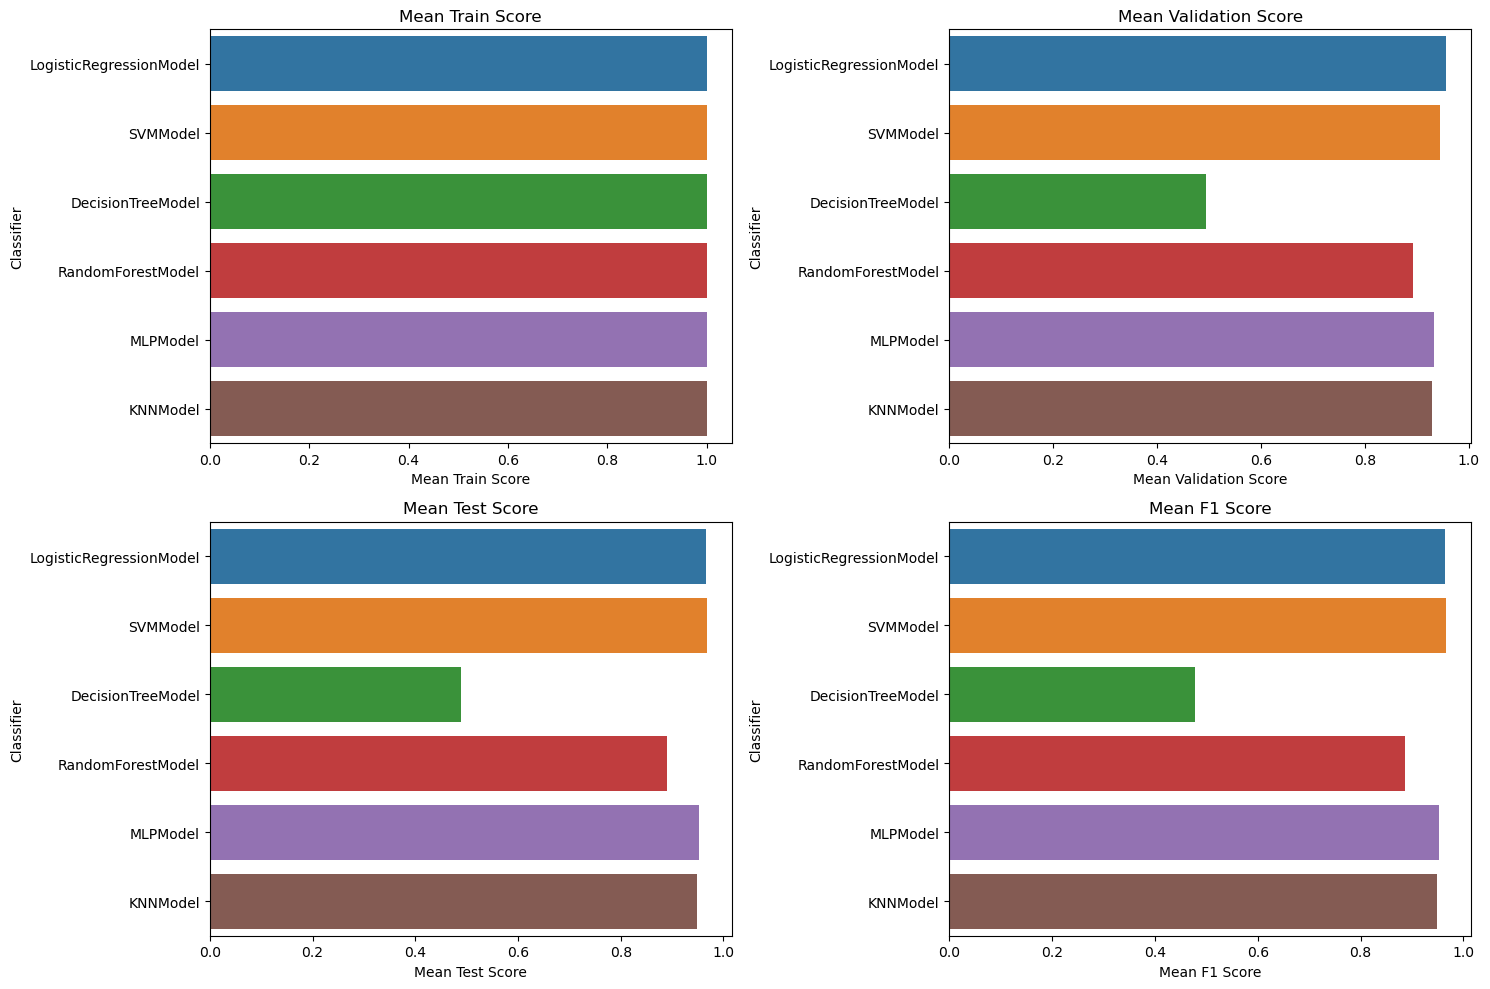

In [31]:
# Mean scores for each model
analyzer.barplot_mean_score(df_scores, df_scores.columns[1:], "Classifier")

## Learning Curves

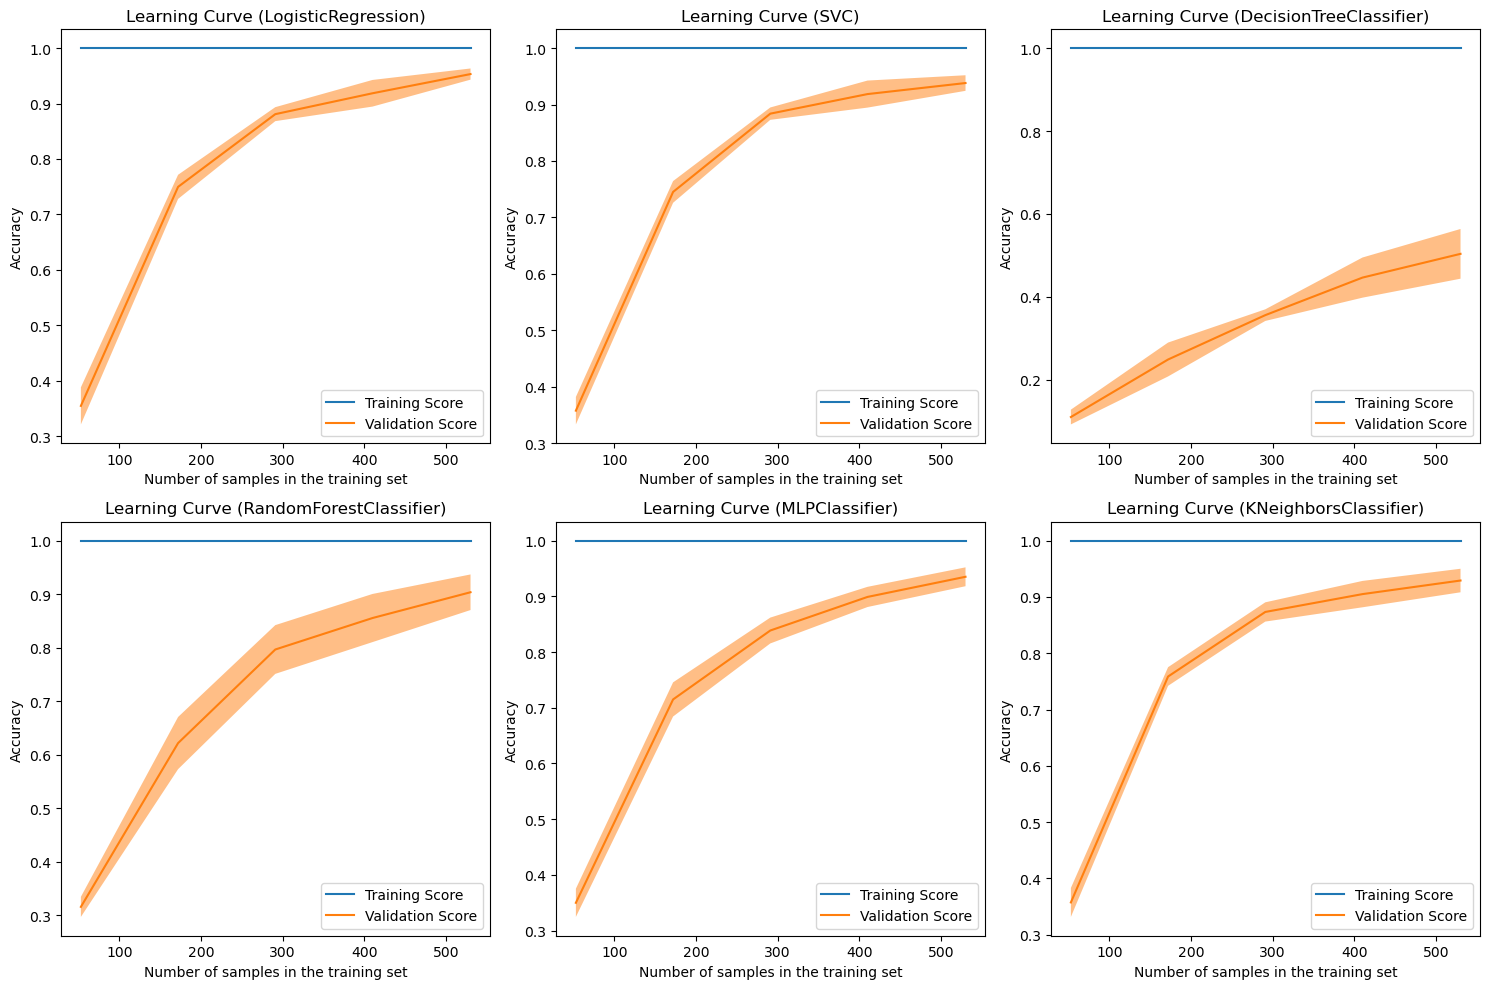

In [33]:
analyzer.plot_learning_curves(all_model, train_data, train_target)

## Validation Curves

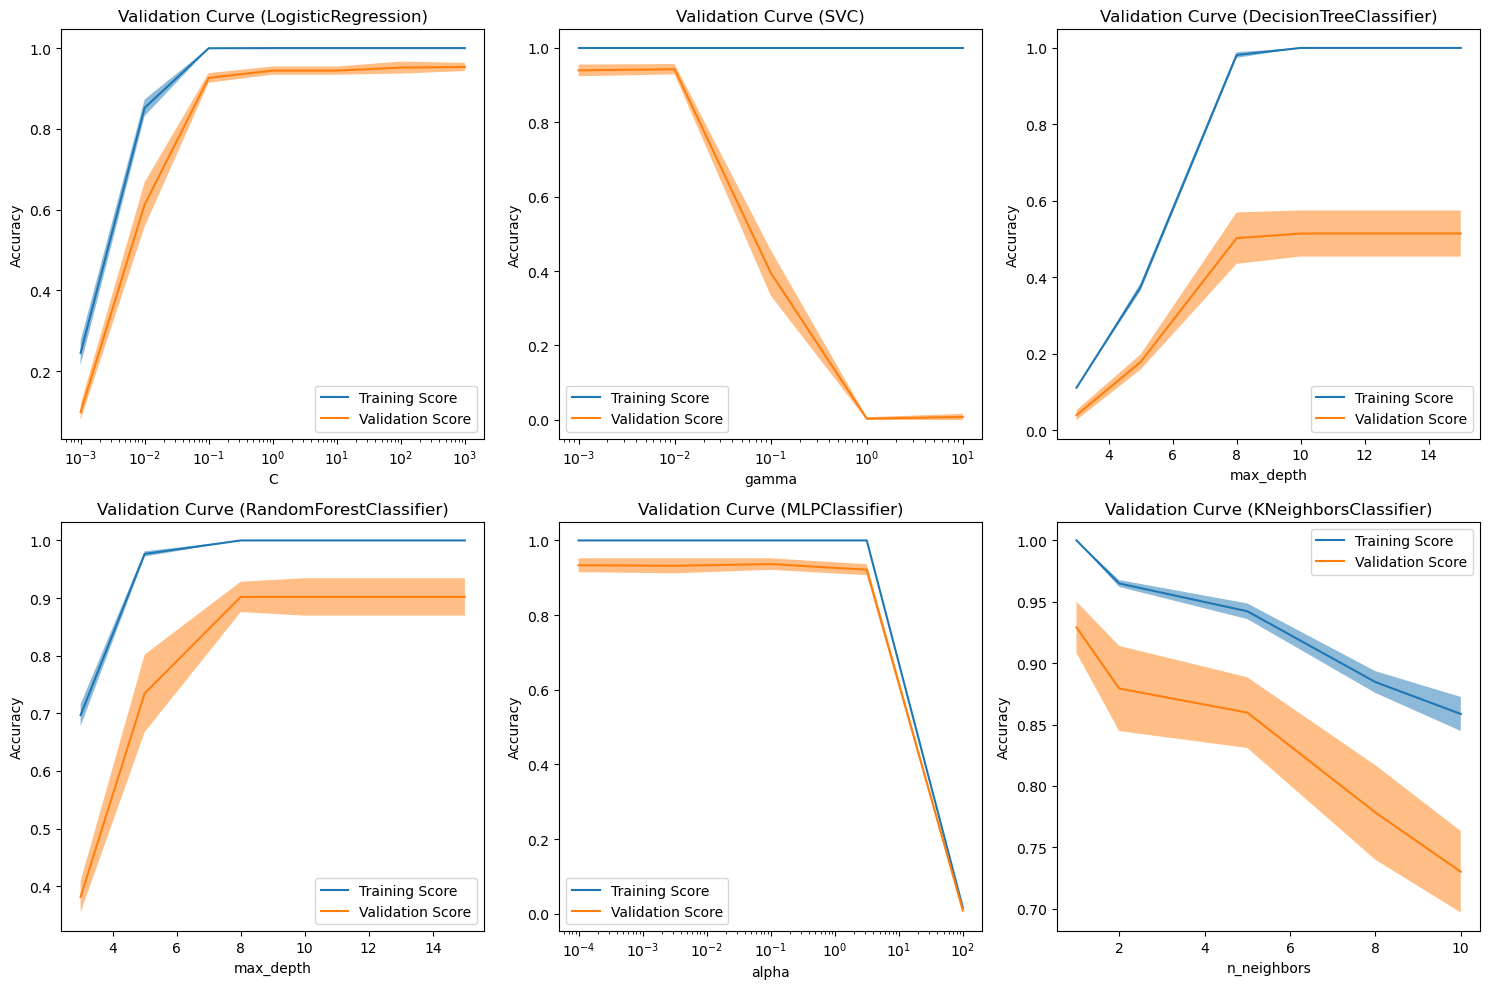

In [34]:
analyzer.plot_validation_curves(all_model, train_data, train_target, all_param_name, all_param_range)

## Roc Curves

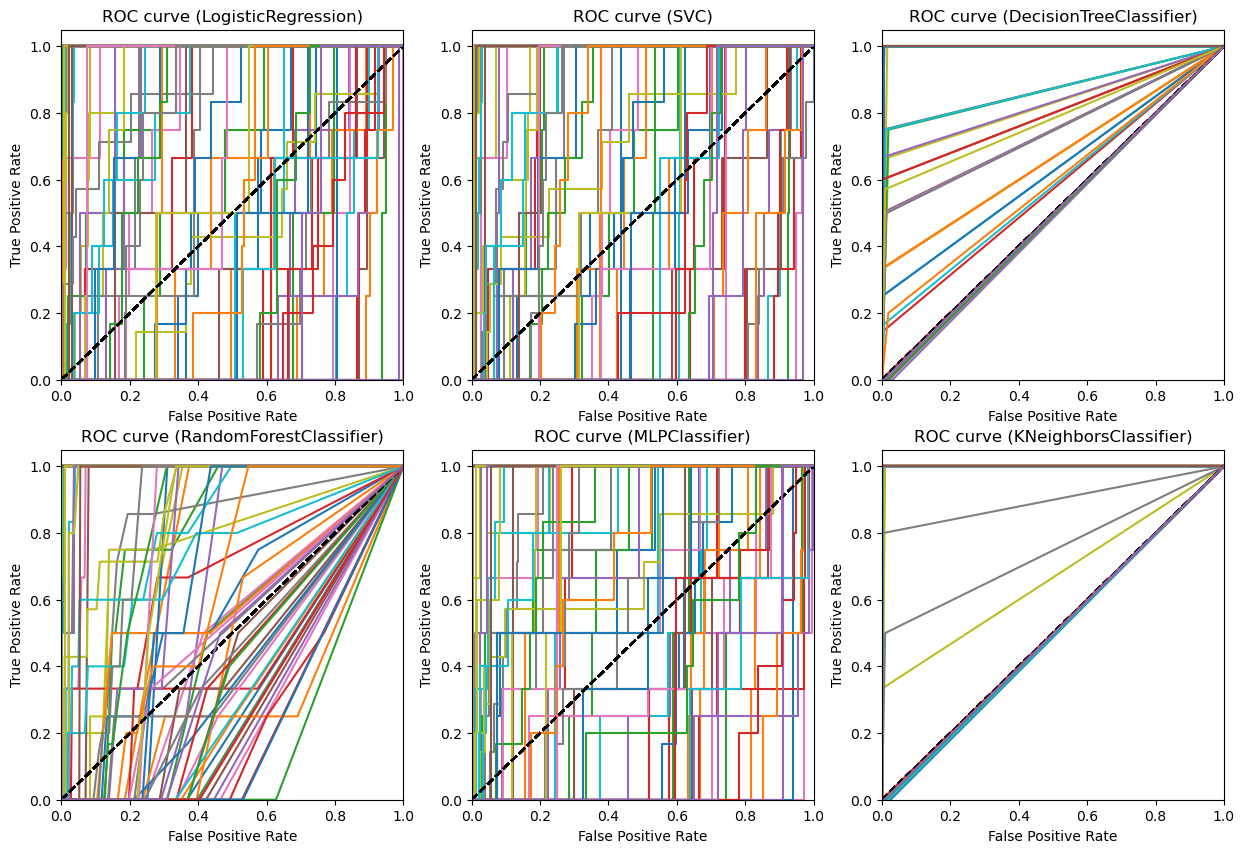

In [35]:
# Roc Curve for each class
analyzer.plot_roc_curve_multilabel(all_model, test_data, test_target)

## Mean Roc Curves

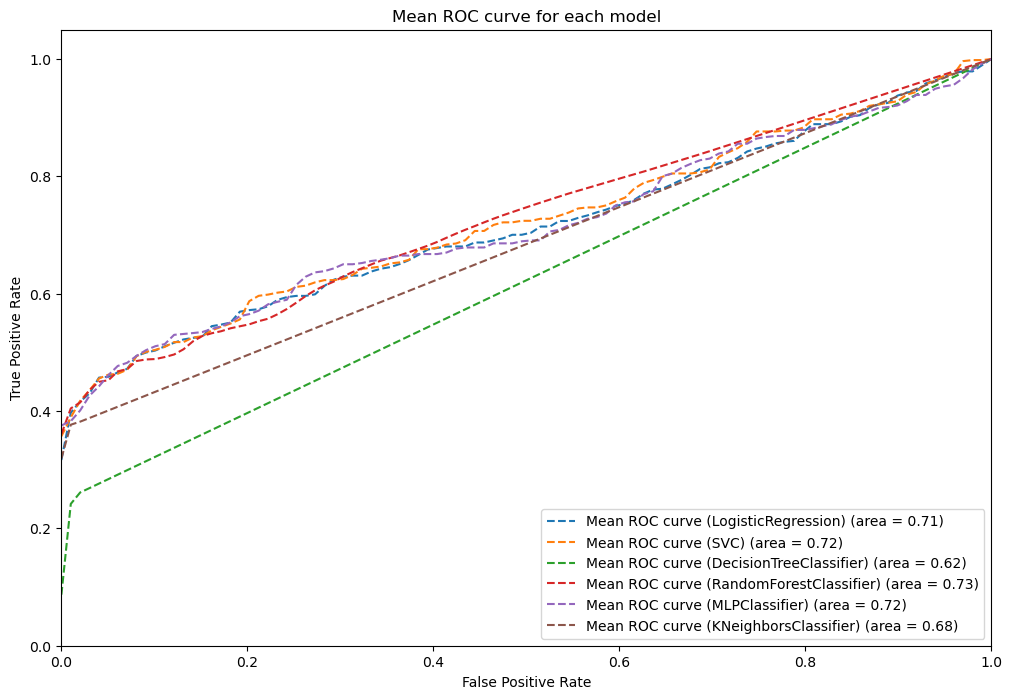

In [32]:
analyzer.plot_mean_roc_curve(all_model, test_data, test_target)

# Principal component analysis (PCA)

## Correlation matrix

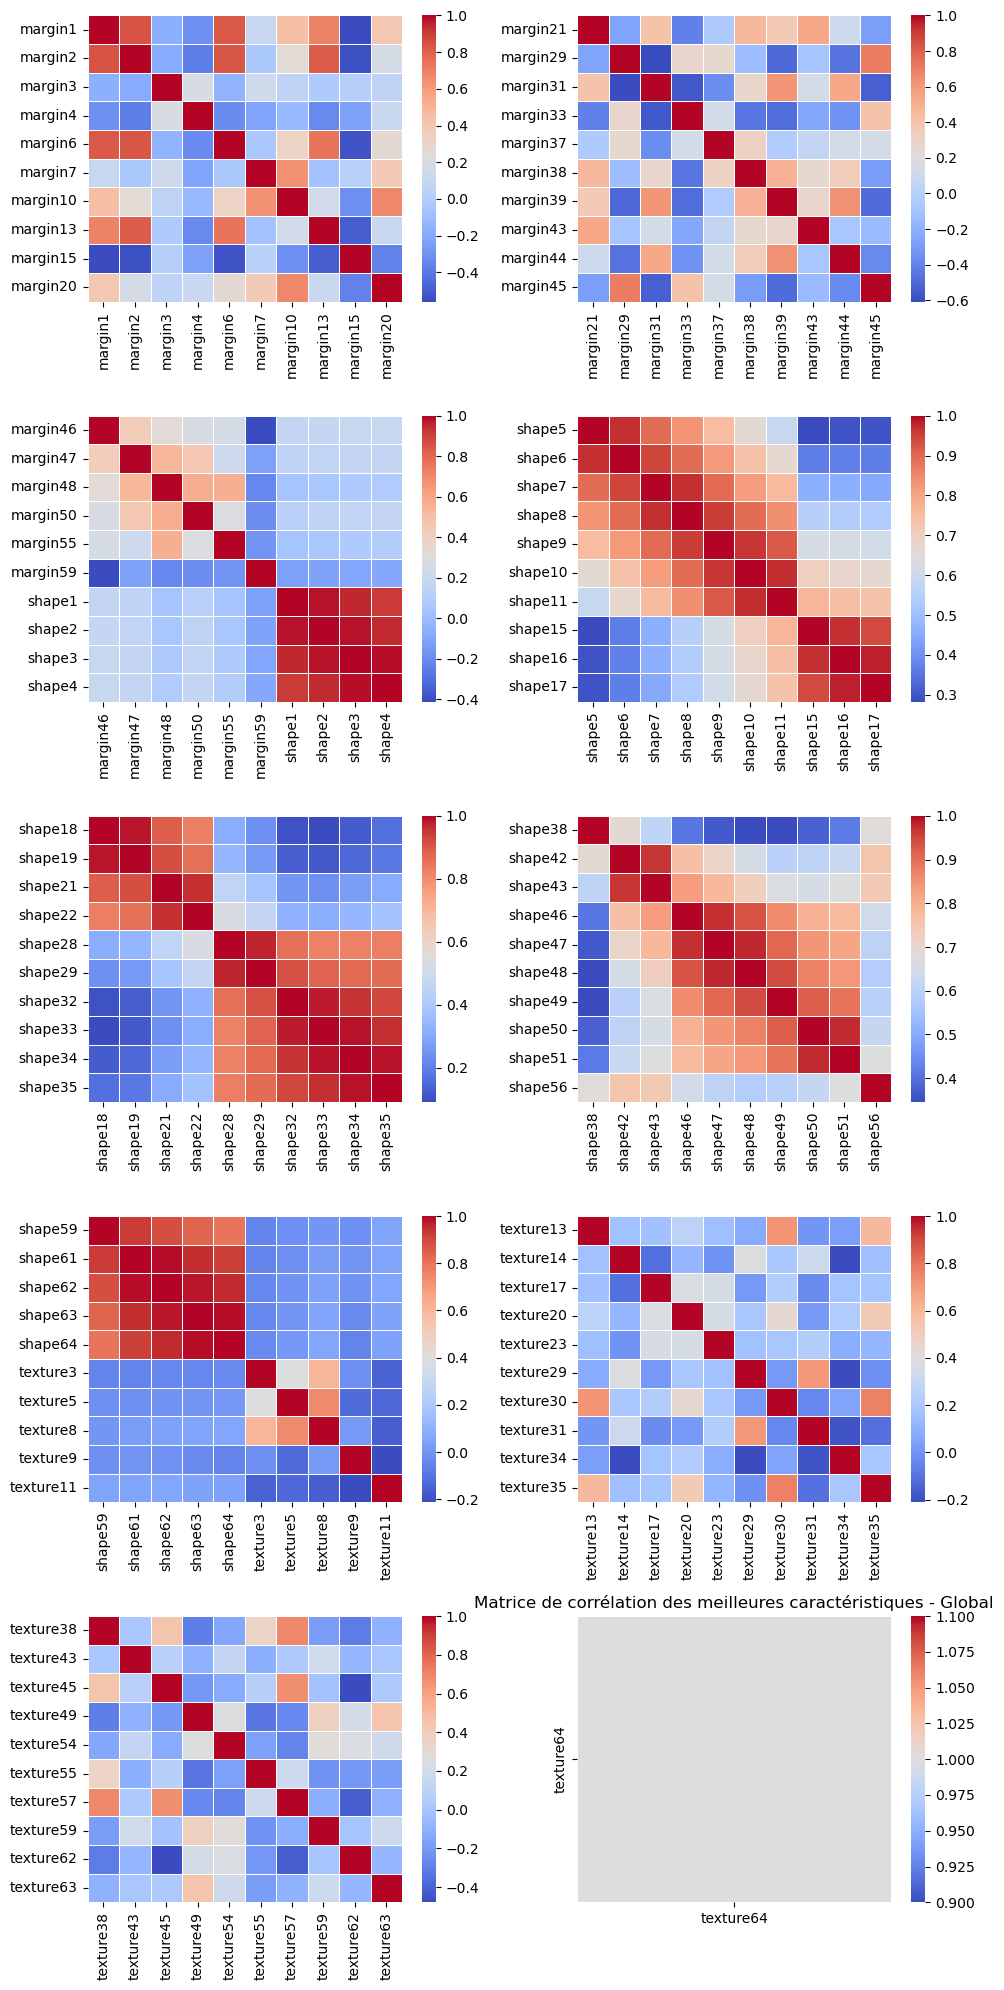

In [17]:
# plot the heatmap correlation
corr_matrix = data_rfe.corr()
analyzer.plot_heatmap_correlation(corr_matrix)

In [36]:
# Reduction of dimensionality by using PCA
pca, df_pca = preprocessor.pca_reduction(data_rfe, target_rfe, 50)

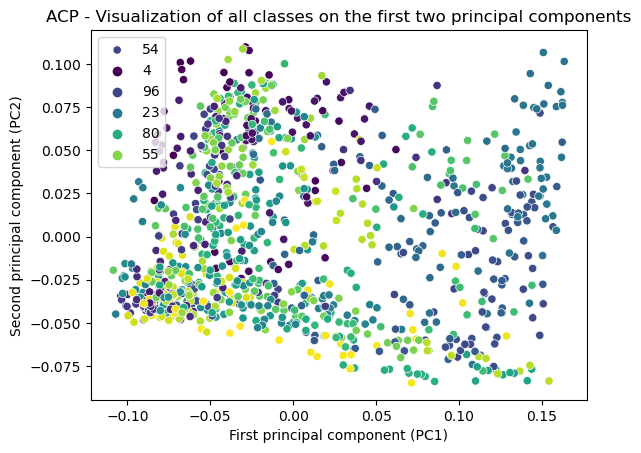

In [37]:
# Plot the first two principal components
analyzer.plot_pca_visualtion_2cp(df_pca, target)

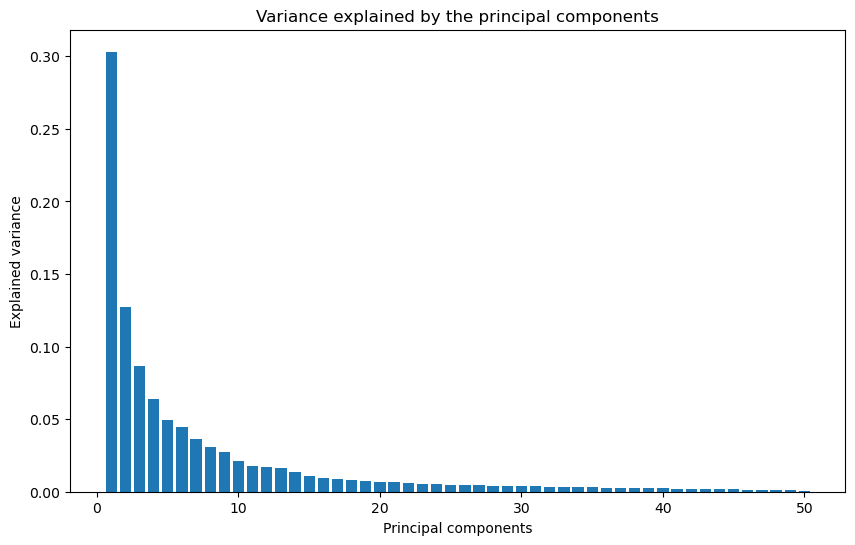

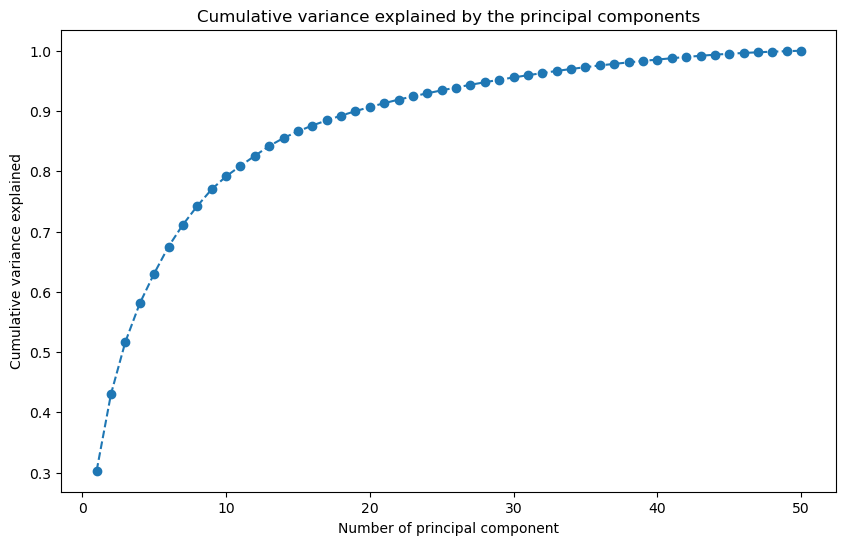

In [38]:
# Explained variance among the principal component analysis
analyzer.plot_pca_variance(pca)

In [39]:
# Percent of the explained variance ratio by the 20 principal component
print(f"Percent of the explained variance ratio by the 20 principal component : {round(pca.explained_variance_ratio_[:20].sum()*100,2)} %")

Percent of the explained variance ratio by the 20 principal component : 90.65 %


In [40]:
print(f"Number of features before the application of the PCA algorithm : {dataset.shape[1]-1}")

Number of features before the application of the PCA algorithm : 184


In [41]:
# get the pca dataset
dataset_pca = df_pca[list(df_pca.columns[:20])+['species']]

# Shuffle the data
dataset_pca = preprocessor.shuffle(dataset_pca)

# Separate target from datas
data_pca, target_pca = preprocessor.split_dataset(dataset_pca, "species")

# Create training set and testing set
train_data, test_data, train_target, test_target = train_test_split(data_pca, target_pca, test_size=0.33, stratify=target)

# Standardization of testing set (the standardization of training set will be for each training subset)
test_data = preprocessor.standardization(test_data, test_data.columns)

In [42]:
print(f"Number of features after the application of the PCA algorithm : {dataset_pca.shape[1]-1}")

Number of features after the application of the PCA algorithm : 21


**After reapplication of the algorithms above :**

## Cross validation scores

In [45]:
df_scores

Classifier  Mean Train Score  Mean Validation Score  \
0  LogisticRegressionModel          0.999623               0.802381   
1                 SVMModel          0.995099               0.820563   
2        DecisionTreeModel          1.000000               0.410196   
3        RandomForestModel          1.000000               0.752518   
4                 MLPModel          1.000000               0.826532   
5                 KNNModel          1.000000               0.767715   

   Mean Test Score  Mean F1 Score  
0         0.803058       0.802573  
1         0.831193       0.830339  
2         0.380428       0.373446  
3         0.774312       0.765936  
4         0.836697       0.836382  
5         0.757187       0.749851

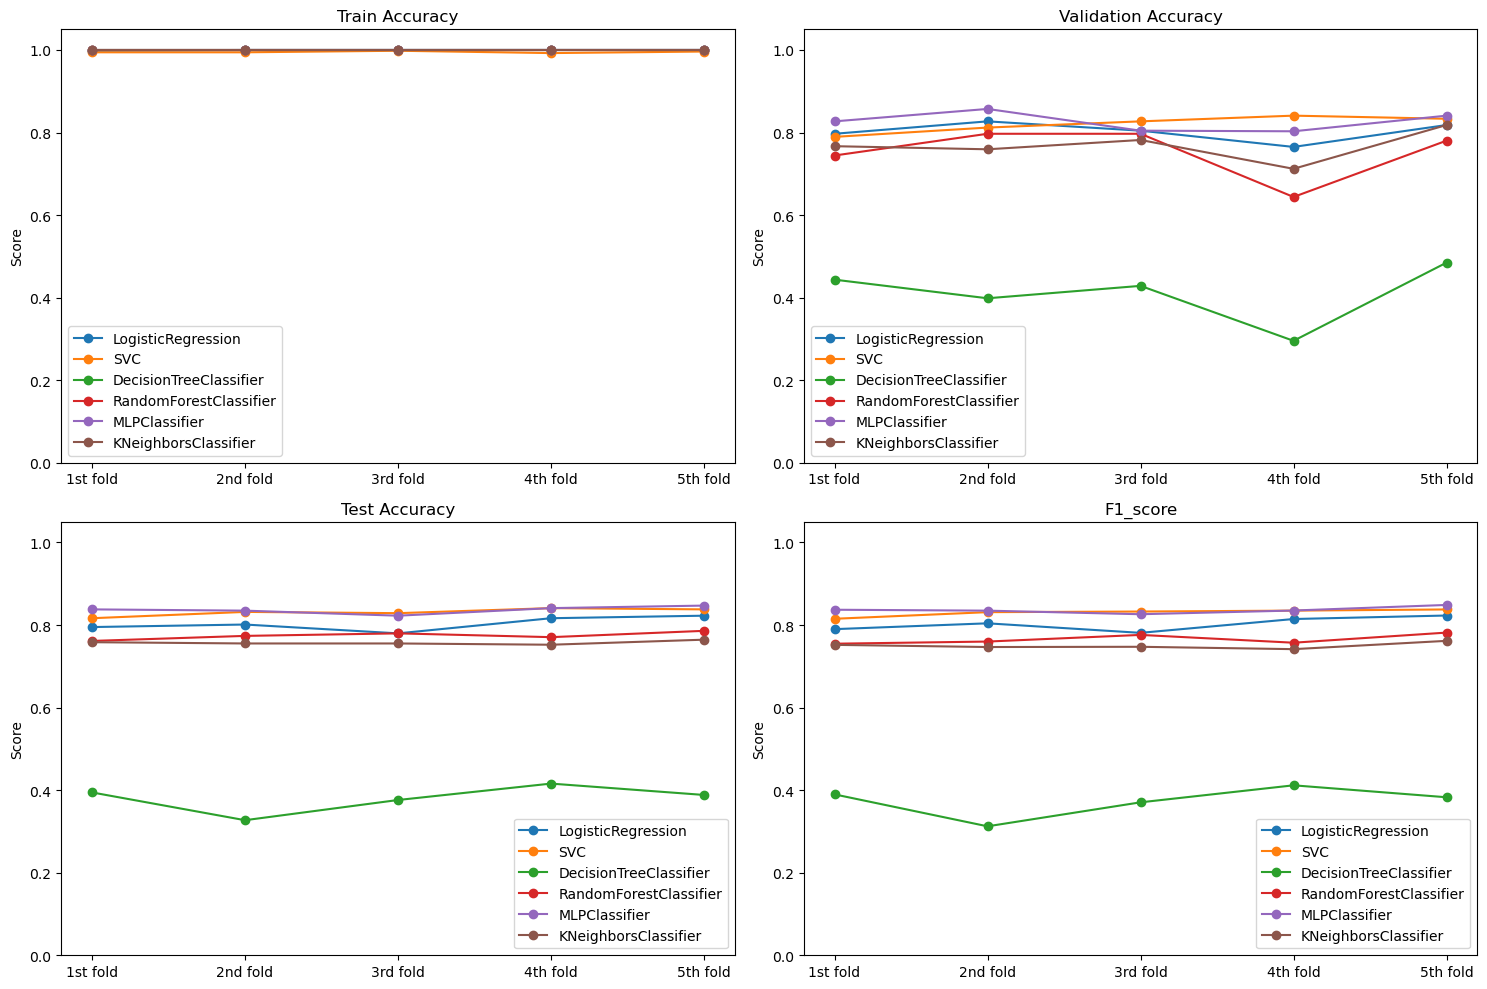

In [46]:
# The different scores according to the different cross-validation splits
analyzer.plot_scores(scores, all_model)

## Mean Scores

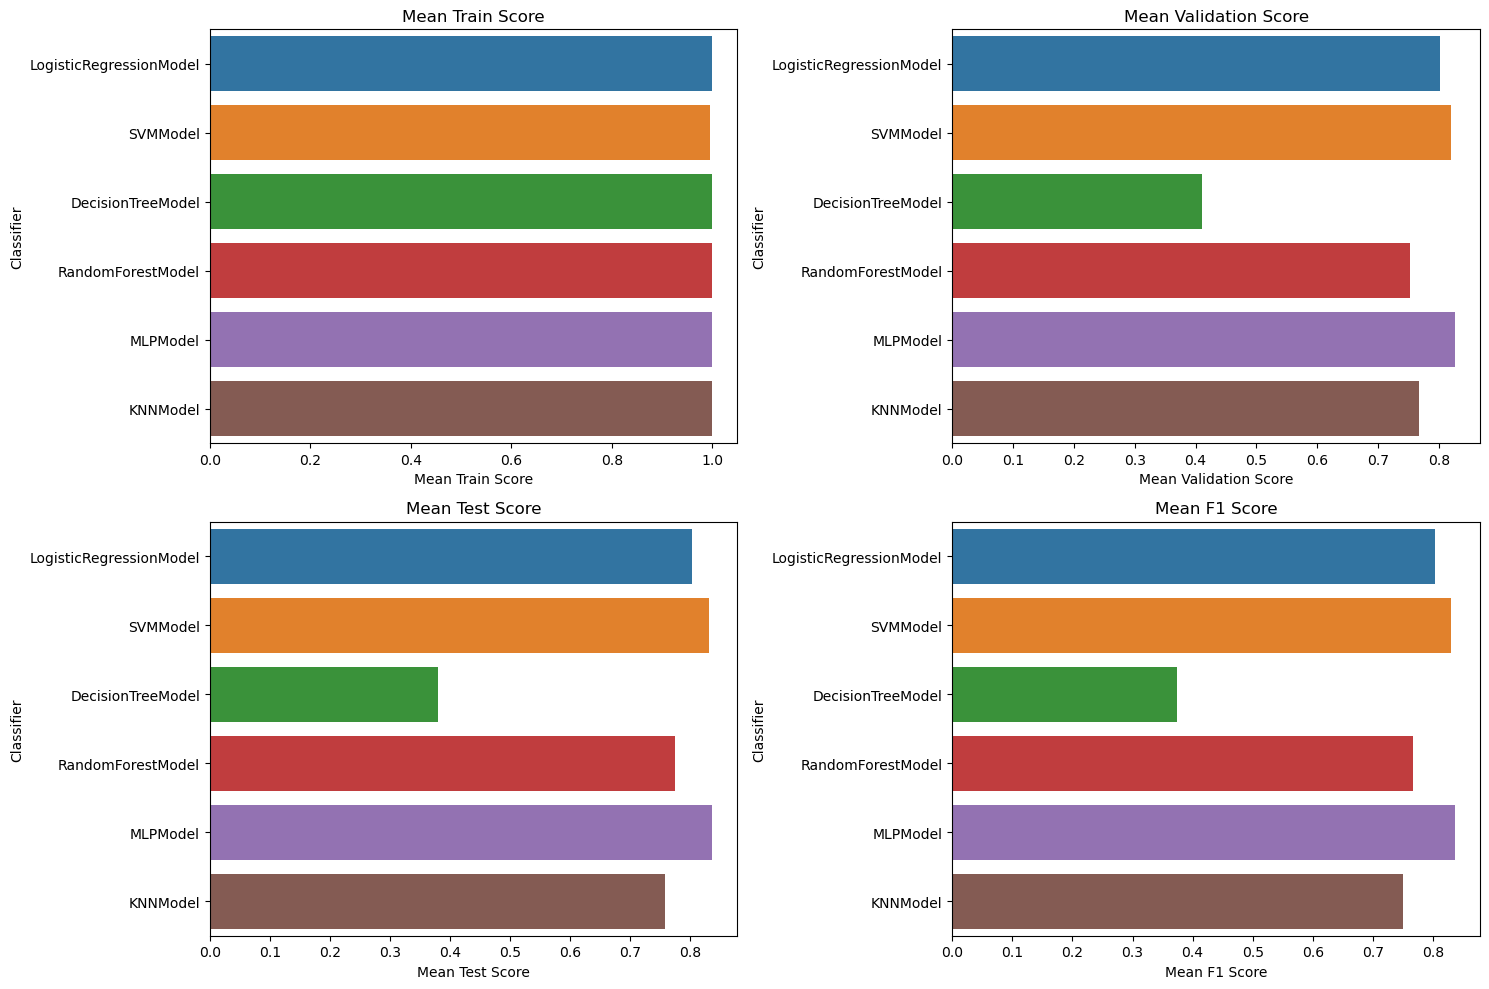

In [47]:
# Mean scores for each model
analyzer.barplot_mean_score(df_scores, df_scores.columns[1:], "Classifier")

## Learning Curves

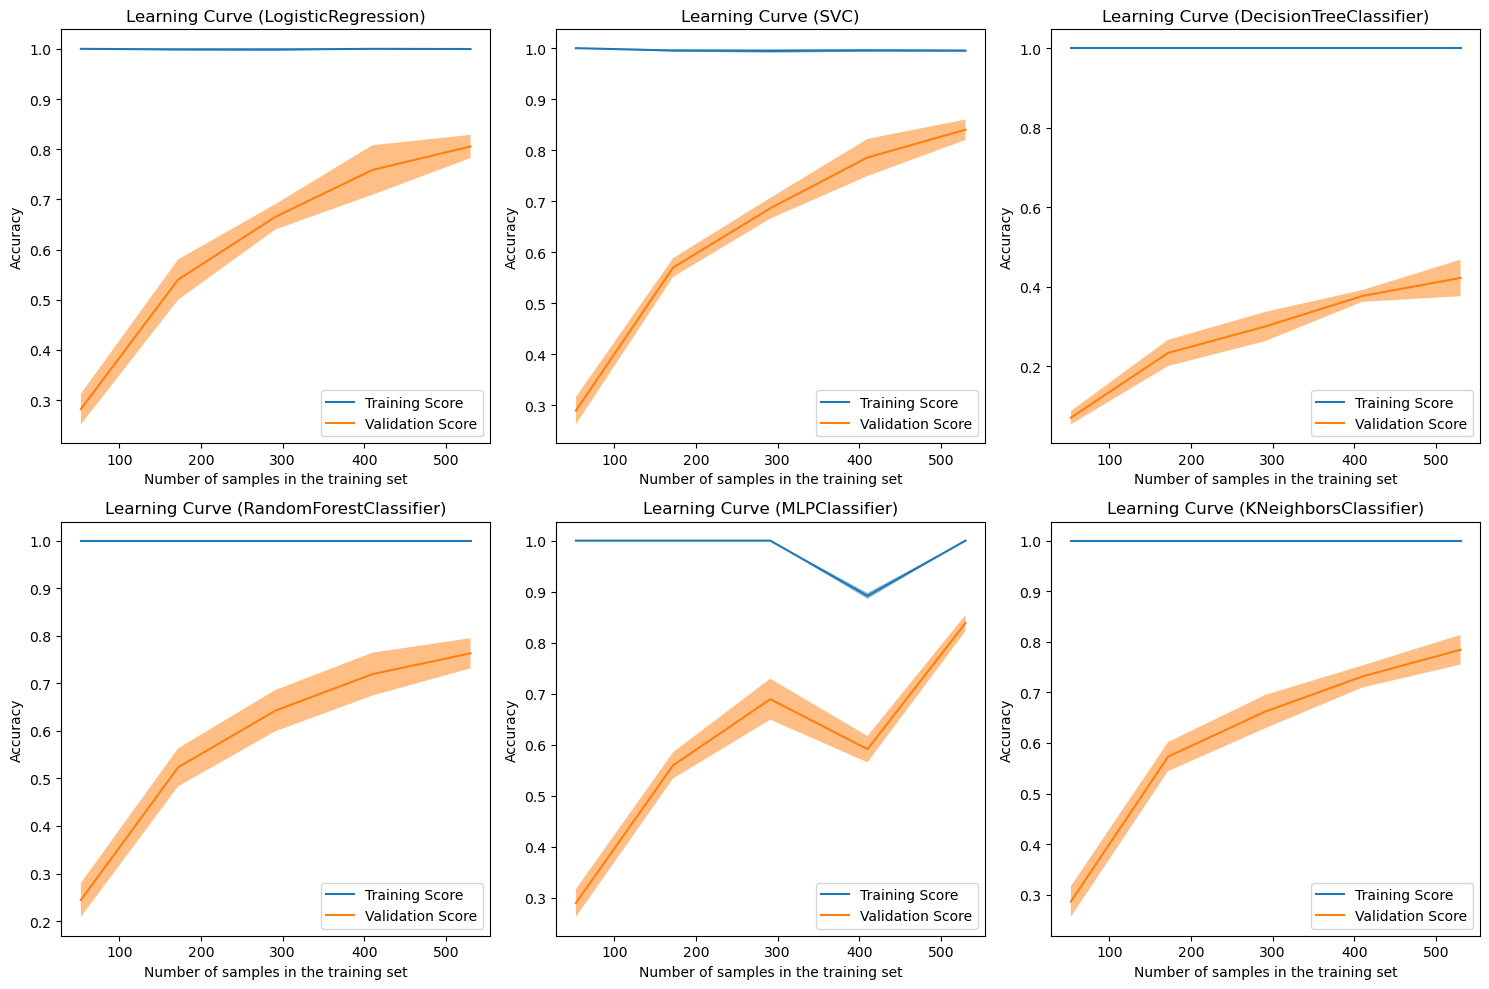

In [49]:
analyzer.plot_learning_curves(all_model, train_data, train_target)

## Validation Curves

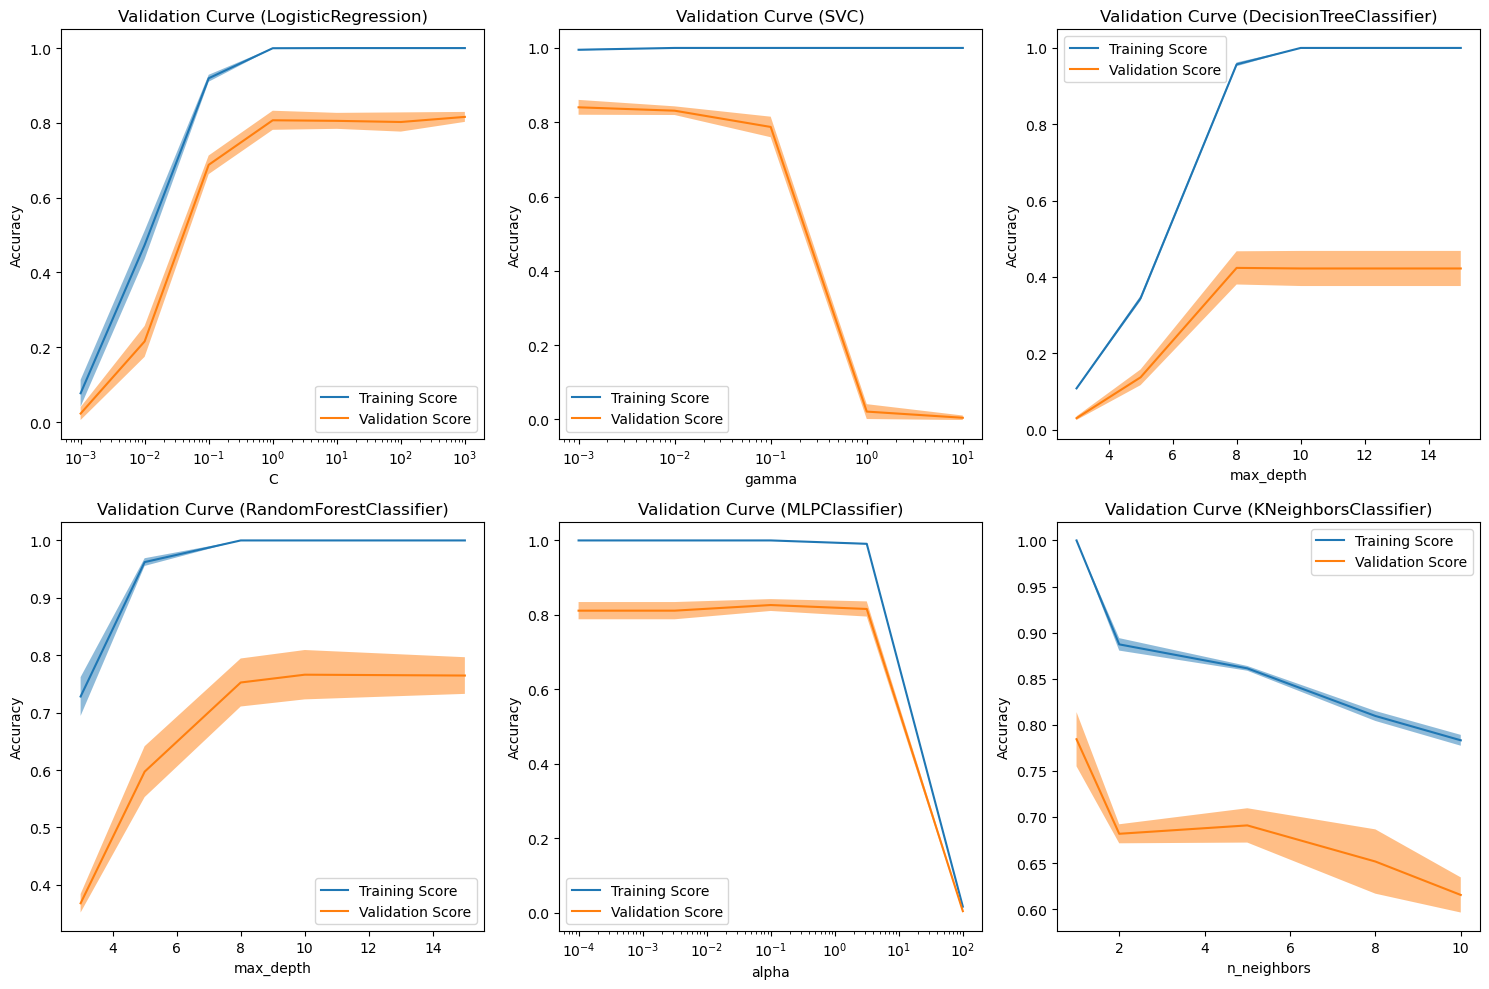

In [50]:
analyzer.plot_validation_curves(all_model, train_data, train_target, all_param_name, all_param_range)

## Roc Curves

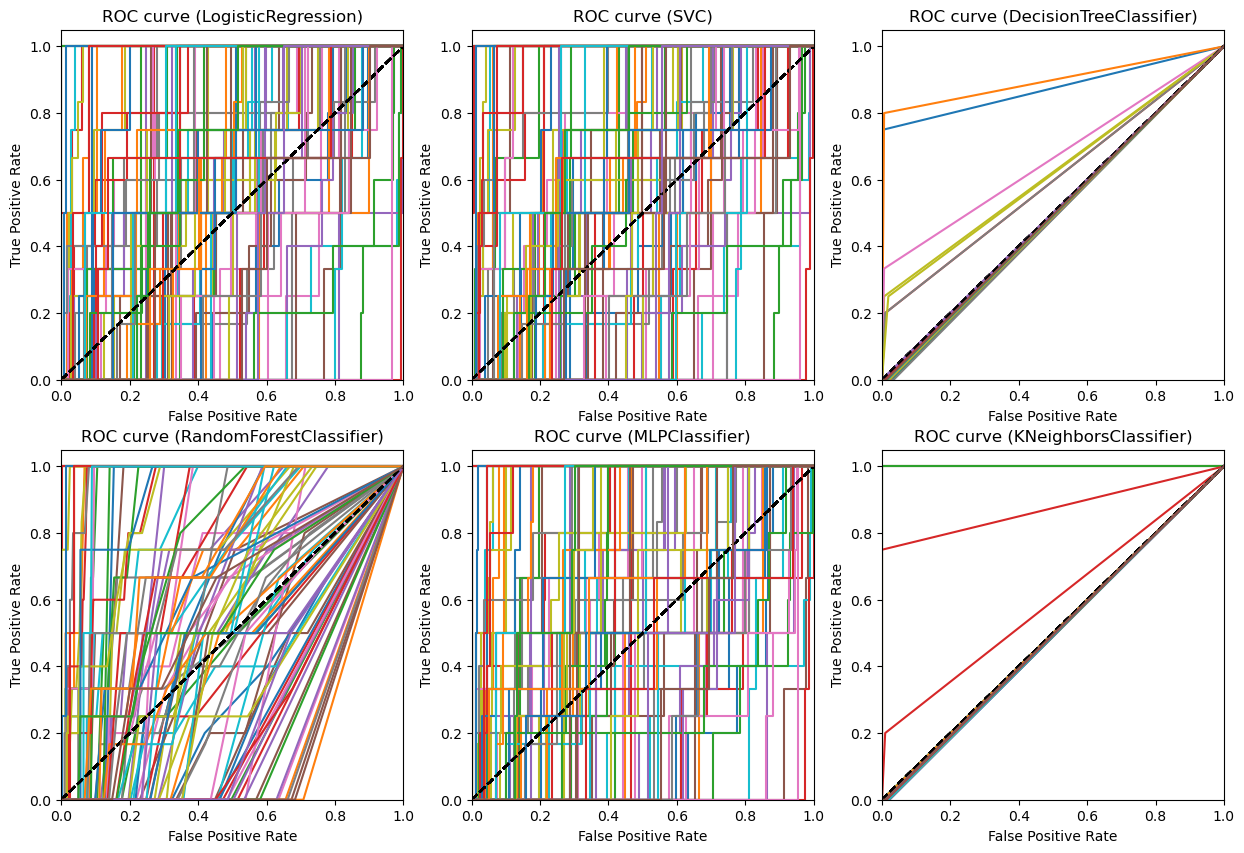

In [51]:
# Roc Curve for each class
analyzer.plot_roc_curve_multilabel(all_model, test_data, test_target)

## Mean Roc Curves

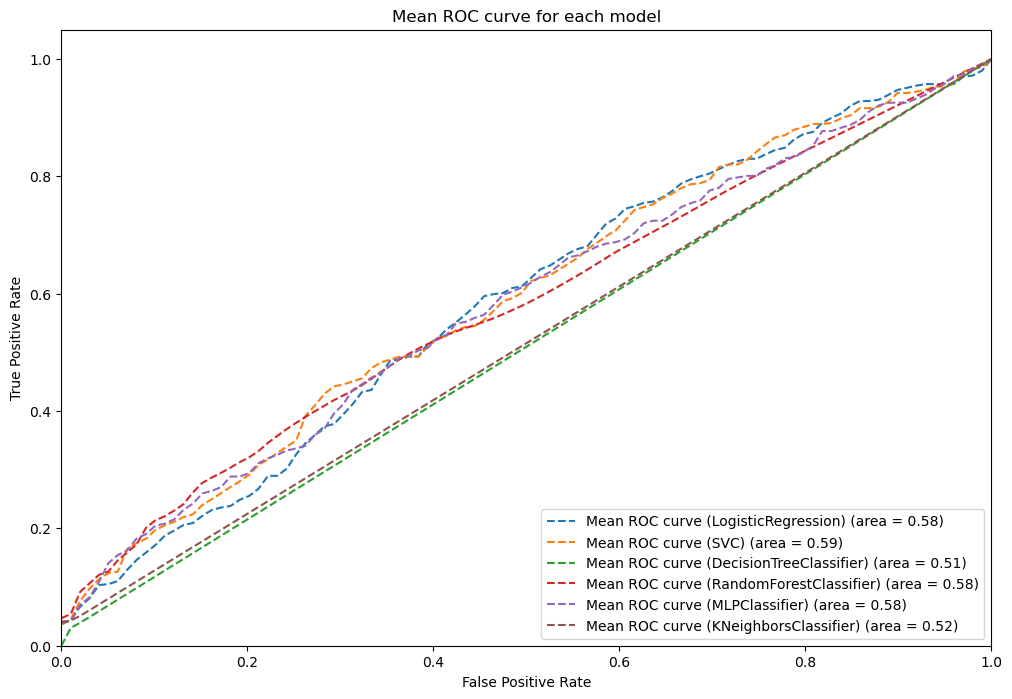

In [48]:
analyzer.plot_mean_roc_curve(all_model, test_data, test_target)